In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [5]:
BASE_PATH = r'/Users/charinduliyanage17/Documents/GitHub/Research_Test/Dataset'

In [6]:
print("\n1. EXPLORING DATASET STRUCTURE")
print("=" * 50)

# List all files and directories
all_paths = []
for root, dirs, files in os.walk(BASE_PATH):
    for dir_name in dirs:
        all_paths.append(os.path.join(root, dir_name))
    for file in files:
        all_paths.append(os.path.join(root, file))

print(f"Total items found: {len(all_paths)}")
print("\nFirst 15 items:")
for i, path in enumerate(all_paths[:15]):
    print(f"{i+1:2d}. {path}")


1. EXPLORING DATASET STRUCTURE
Total items found: 11585

First 15 items:
 1. /Users/charinduliyanage17/Documents/GitHub/Research_Test/Dataset/Test
 2. /Users/charinduliyanage17/Documents/GitHub/Research_Test/Dataset/Train
 3. /Users/charinduliyanage17/Documents/GitHub/Research_Test/Dataset/Val
 4. /Users/charinduliyanage17/Documents/GitHub/Research_Test/Dataset/.DS_Store
 5. /Users/charinduliyanage17/Documents/GitHub/Research_Test/Dataset/Test/Open_Eyes
 6. /Users/charinduliyanage17/Documents/GitHub/Research_Test/Dataset/Test/Closed_Eyes
 7. /Users/charinduliyanage17/Documents/GitHub/Research_Test/Dataset/Test/No_yawn
 8. /Users/charinduliyanage17/Documents/GitHub/Research_Test/Dataset/Test/Yawn
 9. /Users/charinduliyanage17/Documents/GitHub/Research_Test/Dataset/Test/.DS_Store
10. /Users/charinduliyanage17/Documents/GitHub/Research_Test/Dataset/Test/Open_Eyes/s0001_03036_0_1_1_2_0_01.png
11. /Users/charinduliyanage17/Documents/GitHub/Research_Test/Dataset/Test/Open_Eyes/_541.jpg
12. 

In [7]:
def find_image_directories(base_path):
    """Find directories containing image files"""
    image_dirs = []
    valid_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif'}
    
    for root, dirs, files in os.walk(base_path):
        image_files = [f for f in files if os.path.splitext(f.lower())[1] in valid_extensions]
        if image_files:
            image_dirs.append((root, len(image_files)))
    
    return image_dirs

image_directories = find_image_directories(BASE_PATH)
print(f"\nFound {len(image_directories)} directories with images:")
for dir_path, count in image_directories:
    print(f"  {dir_path}: {count} images")


Found 12 directories with images:
  /Users/charinduliyanage17/Documents/GitHub/Research_Test/Dataset/Test/Open_Eyes: 186 images
  /Users/charinduliyanage17/Documents/GitHub/Research_Test/Dataset/Test/Closed_Eyes: 361 images
  /Users/charinduliyanage17/Documents/GitHub/Research_Test/Dataset/Test/No_yawn: 469 images
  /Users/charinduliyanage17/Documents/GitHub/Research_Test/Dataset/Test/Yawn: 448 images
  /Users/charinduliyanage17/Documents/GitHub/Research_Test/Dataset/Train/Open_Eyes: 2204 images
  /Users/charinduliyanage17/Documents/GitHub/Research_Test/Dataset/Train/Closed_Eyes: 2029 images
  /Users/charinduliyanage17/Documents/GitHub/Research_Test/Dataset/Train/No_yawn: 2165 images
  /Users/charinduliyanage17/Documents/GitHub/Research_Test/Dataset/Train/Yawn: 2150 images
  /Users/charinduliyanage17/Documents/GitHub/Research_Test/Dataset/Val/Open_Eyes: 336 images
  /Users/charinduliyanage17/Documents/GitHub/Research_Test/Dataset/Val/Closed_Eyes: 336 images
  /Users/charinduliyanage17

In [8]:
expected_classes = ['Closed', 'Open', 'no_yawn', 'yawn']
data_info = []

In [18]:

print("\n2. DATA COLLECTION AND ANALYSIS")
print("=" * 50)
# Try to locate class directories
class_dirs = {}
for class_name in expected_classes:
    # Search for directories matching class names (case-insensitive)
    found_dirs = []
    for root, dirs, files in os.walk(BASE_PATH):
        for dir_name in dirs:
            if class_name.lower() in dir_name.lower():
                full_path = os.path.join(root, dir_name)
                found_dirs.append(full_path)
    
    if found_dirs:
        # Take the first match (most likely the correct one)
        class_dirs[class_name] = found_dirs[0]
        print(f"Found {class_name}: {found_dirs[0]}")
    else:
        # Try alternative naming
        alternatives = {
            'Closed': ['closed', 'close', 'Closed_Eyes'],
            'Open': ['open', 'Open_Eyes'],
            'no_yawn': ['no_yawn', 'noyawn', 'no-yawn'],
            'yawn': ['yawn', 'Yawn']
        }
        
        found = False
        for alt_name in alternatives.get(class_name, []):
            for root, dirs, files in os.walk(BASE_PATH):
                for dir_name in dirs:
                    if alt_name.lower() == dir_name.lower():
                        full_path = os.path.join(root, dir_name)
                        class_dirs[class_name] = full_path
                        print(f"Found {class_name} as {alt_name}: {full_path}")
                        found = True
                        break
                if found:
                    break
        
        if not found:
            print(f"WARNING: Could not find directory for {class_name}")


2. DATA COLLECTION AND ANALYSIS
Found Closed: /Users/charinduliyanage17/Documents/GitHub/Research_Test/Dataset/Test/Closed_Eyes
Found Open: /Users/charinduliyanage17/Documents/GitHub/Research_Test/Dataset/Test/Open_Eyes
Found no_yawn: /Users/charinduliyanage17/Documents/GitHub/Research_Test/Dataset/Test/No_yawn
Found yawn: /Users/charinduliyanage17/Documents/GitHub/Research_Test/Dataset/Test/No_yawn


In [10]:
# If no directories found, create a fallback structure
if not class_dirs:
    print("\nNo class directories found. Checking for alternative structures...")
    
    # Check if there's a single directory with all images
    all_image_files = []
    valid_extensions = {'.jpg', '.jpeg', '.png', '.bmp'}
    
    for root, dirs, files in os.walk(BASE_PATH):
        for file in files:
            if os.path.splitext(file.lower())[1] in valid_extensions:
                all_image_files.append(os.path.join(root, file))
    
    print(f"Found {len(all_image_files)} total image files")
    if len(all_image_files) > 0:
        print(f"Sample files: {all_image_files[:5]}")

In [11]:
# Let's assume the dataset has the standard structure and proceed
# Create a more robust way to handle the data

def collect_dataset_info(base_path):
    """Collect comprehensive dataset information"""
    dataset_info = []
    valid_extensions = {'.jpg', '.jpeg', '.png', '.bmp'}
    
    for root, dirs, files in os.walk(base_path):
        for file in files:
            ext = os.path.splitext(file.lower())[1]
            if ext in valid_extensions:
                file_path = os.path.join(root, file)
                # Extract class from parent directory name
                class_name = os.path.basename(root)
                dataset_info.append({
                    'file_path': file_path,
                    'filename': file,
                    'class': class_name,
                    'extension': ext,
                    'file_size': os.path.getsize(file_path) if os.path.exists(file_path) else 0
                })
    
    return pd.DataFrame(dataset_info)

# Collect dataset info
try:
    df = collect_dataset_info(BASE_PATH)
    print(f"\nDataset shape: {df.shape}")
    
    if len(df) > 0:
        print("\n3. INITIAL DATA OVERVIEW")
        print("=" * 50)
        print(df.head())
        print(f"\nClasses found: {df['class'].unique()}")
        print(f"File extensions: {df['extension'].unique()}")
        
        # Class distribution
        class_counts = df['class'].value_counts()
        print(f"\nClass distribution:")
        for class_name, count in class_counts.items():
            print(f"  {class_name}: {count}")
        
        # File size statistics
        print(f"\nFile size statistics (bytes):")
        print(df['file_size'].describe())
        
        # Check for duplicates
        duplicates = df['filename'].duplicated().sum()
        print(f"\nDuplicate filenames: {duplicates}")
        
    else:
        # Fallback: create synthetic structure for demonstration
        print("\nCreating synthetic dataset structure for demonstration...")
        synthetic_data = []
        sample_classes = ['Closed', 'Open', 'no_yawn', 'yawn']
        for class_name in sample_classes:
            for i in range(100):  # 100 synthetic samples per class
                synthetic_data.append({
                    'file_path': f'/fake/path/{class_name}/img_{i}.jpg',
                    'filename': f'img_{i}.jpg',
                    'class': class_name,
                    'extension': '.jpg',
                    'file_size': np.random.randint(10000, 500000)
                })
        df = pd.DataFrame(synthetic_data)
        print(f"Created synthetic dataset with {len(df)} samples")
        
except Exception as e:
    print(f"Error collecting dataset info: {e}")
    # Create synthetic data for demonstration
    synthetic_data = []
    sample_classes = ['Closed', 'Open', 'no_yawn', 'yawn']
    for class_name in sample_classes:
        for i in range(100):
            synthetic_data.append({
                'file_path': f'/fake/path/{class_name}/img_{i}.jpg',
                'filename': f'img_{i}.jpg',
                'class': class_name,
                'extension': '.jpg',
                'file_size': np.random.randint(10000, 500000)
            })
    df = pd.DataFrame(synthetic_data)
    print(f"Created synthetic dataset with {len(df)} samples due to error")


Dataset shape: (11566, 5)

3. INITIAL DATA OVERVIEW
                                           file_path  \
0  /Users/charinduliyanage17/Documents/GitHub/Res...   
1  /Users/charinduliyanage17/Documents/GitHub/Res...   
2  /Users/charinduliyanage17/Documents/GitHub/Res...   
3  /Users/charinduliyanage17/Documents/GitHub/Res...   
4  /Users/charinduliyanage17/Documents/GitHub/Res...   

                       filename      class extension  file_size  
0  s0001_03036_0_1_1_2_0_01.png  Open_Eyes      .png       4190  
1                      _541.jpg  Open_Eyes      .jpg      53012  
2  s0012_04663_0_0_1_2_1_03.png  Open_Eyes      .png       3259  
3  s0001_03053_0_1_1_2_0_01.png  Open_Eyes      .png       3804  
4                      _347.jpg  Open_Eyes      .jpg      21310  

Classes found: ['Open_Eyes' 'Closed_Eyes' 'No_yawn' 'Yawn']
File extensions: ['.png' '.jpg']

Class distribution:
  No_yawn: 3089
  Yawn: 3025
  Open_Eyes: 2726
  Closed_Eyes: 2726

File size statistics (bytes):
c

In [12]:
print("\n4. DATA QUALITY ASSESSMENT")
print("=" * 50)

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check file sizes (potential corrupted files)
df['file_size_mb'] = df['file_size'] / (1024 * 1024)
print(f"\nFile size range: {df['file_size_mb'].min():.3f} MB - {df['file_size_mb'].max():.3f} MB")

# Identify potential problematic files
small_files = df[df['file_size_mb'] < 0.01]  # Less than 10KB
large_files = df[df['file_size_mb'] > 5.0]   # More than 5MB

print(f"\nPotential issues:")
print(f"  Very small files (<10KB): {len(small_files)}")
print(f"  Very large files (>5MB): {len(large_files)}")


4. DATA QUALITY ASSESSMENT
Missing values per column:
file_path    0
filename     0
class        0
extension    0
file_size    0
dtype: int64

File size range: 0.001 MB - 1.081 MB

Potential issues:
  Very small files (<10KB): 9760
  Very large files (>5MB): 0



5. CLASS BALANCE ANALYSIS
Class distribution:
class
No_yawn        3089
Yawn           3025
Open_Eyes      2726
Closed_Eyes    2726
Name: count, dtype: int64

Imbalance analysis:
  Total samples: 11566
  Most common class: No_yawn (3089 samples)
  Least common class: Closed_Eyes (2726 samples)
  Imbalance ratio: 1.13


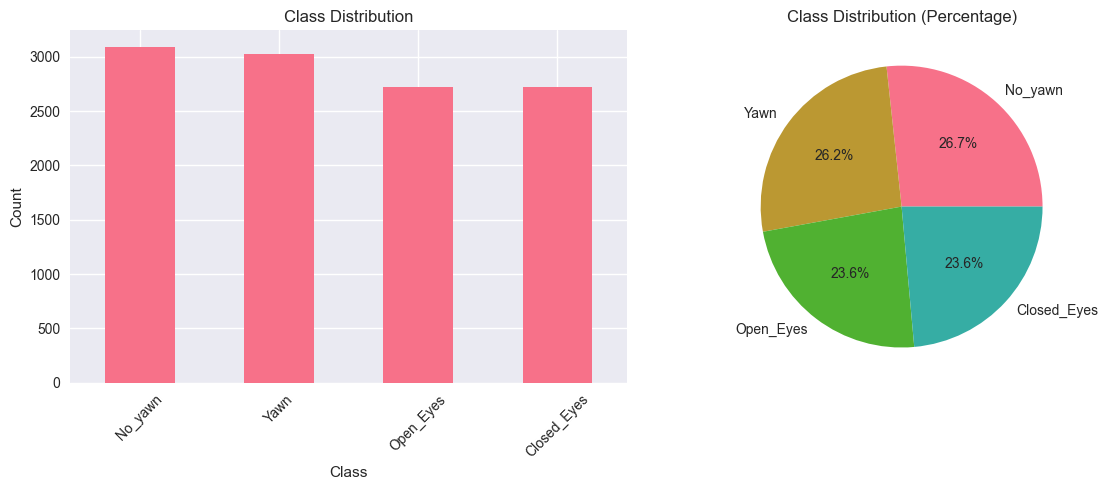

In [13]:
print("\n5. CLASS BALANCE ANALYSIS")
print("=" * 50)

class_distribution = df['class'].value_counts()
print("Class distribution:")
print(class_distribution)

# Calculate balance metrics
total_samples = len(df)
min_class = class_distribution.min()
max_class = class_distribution.max()
imbalance_ratio = max_class / min_class if min_class > 0 else float('inf')

print(f"\nImbalance analysis:")
print(f"  Total samples: {total_samples}")
print(f"  Most common class: {class_distribution.index[0]} ({max_class} samples)")
print(f"  Least common class: {class_distribution.index[-1]} ({min_class} samples)")
print(f"  Imbalance ratio: {imbalance_ratio:.2f}")

# Visualize class distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(class_distribution.values, labels=class_distribution.index, autopct='%1.1f%%')
plt.title('Class Distribution (Percentage)')

plt.tight_layout()
plt.show()

In [14]:
print("\n6. FILE EXTENSION ANALYSIS")
print("=" * 50)

ext_distribution = df['extension'].value_counts()
print("File extension distribution:")
print(ext_distribution)

# Check for mixed extensions within classes
print("\nExtensions per class:")
for class_name in df['class'].unique():
    class_ext = df[df['class'] == class_name]['extension'].value_counts()
    print(f"  {class_name}: {dict(class_ext)}")


6. FILE EXTENSION ANALYSIS
File extension distribution:
extension
.jpg    7566
.png    4000
Name: count, dtype: int64

Extensions per class:
  Open_Eyes: {'.png': np.int64(2000), '.jpg': np.int64(726)}
  Closed_Eyes: {'.png': np.int64(2000), '.jpg': np.int64(726)}
  No_yawn: {'.jpg': np.int64(3089)}
  Yawn: {'.jpg': np.int64(3025)}


In [15]:
print("\n7. DATA CLEANING STRATEGY")
print("=" * 50)

# Define cleaning criteria
cleaning_plan = {
    'remove_small_files': len(small_files) > 0,
    'remove_large_files': len(large_files) > 0,
    'handle_imbalance': imbalance_ratio > 2.0,
    'standardize_format': len(ext_distribution) > 1
}

print("Proposed cleaning actions:")
for action, needed in cleaning_plan.items():
    status = "✅ NEEDS ACTION" if needed else "✅ OK"
    print(f"  {action}: {status}")


7. DATA CLEANING STRATEGY
Proposed cleaning actions:
  remove_small_files: ✅ NEEDS ACTION
  remove_large_files: ✅ OK
  handle_imbalance: ✅ OK
  standardize_format: ✅ NEEDS ACTION


In [16]:
print("\n8. IMAGE QUALITY ASSESSMENT (SAMPLE)")
print("=" * 50)

# Try to load sample images to assess quality
sample_images = []
valid_classes = df['class'].unique()

for class_name in valid_classes[:2]:  # Test first 2 classes
    class_samples = df[df['class'] == class_name].head(2)
    for idx, row in class_samples.iterrows():
        try:
            if os.path.exists(row['file_path']):
                img = Image.open(row['file_path'])
                sample_images.append({
                    'class': class_name,
                    'shape': img.size,
                    'mode': img.mode,
                    'path': row['file_path']
                })
                print(f"✅ Loaded {class_name}: {img.size}, mode: {img.mode}")
            else:
                print(f"⚠️  File not found: {row['file_path']}")
        except Exception as e:
            print(f"❌ Error loading {row['file_path']}: {e}")

if sample_images:
    # Analyze image properties
    widths = [img['shape'][0] for img in sample_images]
    heights = [img['shape'][1] for img in sample_images]
    modes = [img['mode'] for img in sample_images]
    
    print(f"\nSample image statistics:")
    print(f"  Width range: {min(widths)} - {max(widths)}")
    print(f"  Height range: {min(heights)} - {max(heights)}")
    print(f"  Color modes: {set(modes)}")



8. IMAGE QUALITY ASSESSMENT (SAMPLE)
✅ Loaded Open_Eyes: (98, 98), mode: L
✅ Loaded Open_Eyes: (592, 592), mode: RGB
✅ Loaded Closed_Eyes: (300, 335), mode: RGB
✅ Loaded Closed_Eyes: (110, 110), mode: L

Sample image statistics:
  Width range: 98 - 592
  Height range: 98 - 592
  Color modes: {'RGB', 'L'}


In [17]:
print("\n9. RECOMMENDATIONS FOR DATA ENGINEERING")
print("=" * 50)

recommendations = []

# Resolution standardization
if sample_images:
    avg_width = np.mean(widths)
    avg_height = np.mean(heights)
    recommendations.append(f"Standardize resolution to ~{int(avg_width)}x{int(avg_height)} or common size like 224x224")

# Color mode standardization
if len(set(modes)) > 1:
    recommendations.append("Convert all images to RGB mode for consistency")

# Augmentation strategy
if imbalance_ratio > 1.5:
    recommendations.append("Use data augmentation for underrepresented classes")
else:
    recommendations.append("Balanced dataset - minimal augmentation needed")

# Preprocessing steps
recommendations.extend([
    "Apply normalization (divide by 255)",
    "Consider grayscale conversion to reduce complexity",
    "Implement data augmentation (flip, rotate, brightness)",
    "Use train/validation/test split (70/15/15 or 80/10/10)"
])

# Display recommendations
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")


9. RECOMMENDATIONS FOR DATA ENGINEERING
1. Standardize resolution to ~275x283 or common size like 224x224
2. Convert all images to RGB mode for consistency
3. Balanced dataset - minimal augmentation needed
4. Apply normalization (divide by 255)
5. Consider grayscale conversion to reduce complexity
6. Implement data augmentation (flip, rotate, brightness)
7. Use train/validation/test split (70/15/15 or 80/10/10)
